# Random Forests and Decision Trees

## Decision Trees in isolation

In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import seaborn

In [2]:
seaborn.set(rc = {"figure.figsize":(12,8)})
seaborn.set_style("whitegrid")

### Creating dummy data for our decision tree
four blobs 

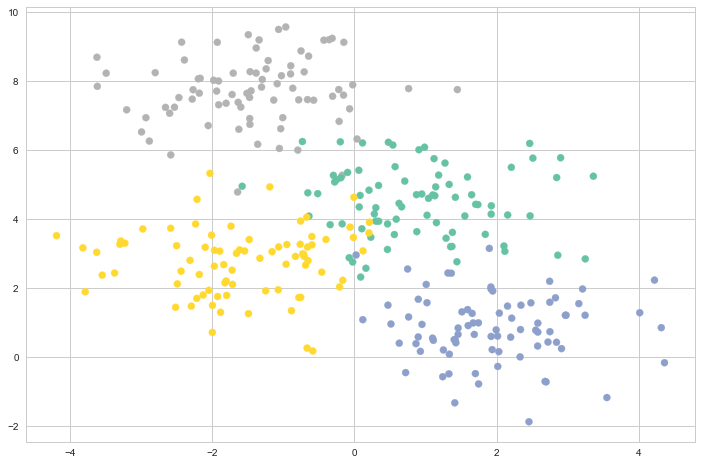

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 320, 
                 centers = 4, 
                 random_state = 0,
                 cluster_std = 1)

plt.scatter(X[:, 0],
            X[:, 1],
            c = y,
            s = 50,
            cmap = "Set2")

### Creating a decision tree classifier using our test data

In [4]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

### Helper function to visualize model

In [5]:
def visualize_classifier(model,
                        X, 
                        y,
                        ax = None,
                        cmap = "rainbow"
                        ):
    ax = ax or plt.gca()
    
    #Plot the training points
    
    ax.scatter(X[:, 0],
               X[:, 1],
               c = y,
               s = 30,
               cmap = cmap,
               clim = (y.min(), y.max()), zorder = 3)
    
    ax.axis("tight")
    ax.axis("off")
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
               
    # Fit the estimator
               
    model.fit(X, y)          
    xx, yy = np.meshgrid(numpy.linspace(*xlim, num=200),
                        numpy.linspace(*ylim, num=200))
    Z = model.predict(numpy.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.1,
                                      levels=numpy.arange(n_classes + 1) - 0.5,
                                      cmap=cmap, clim=(y.min(), y.max()),
                                      zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

### Visualize the Decision Tree

NameError: name 'np' is not defined

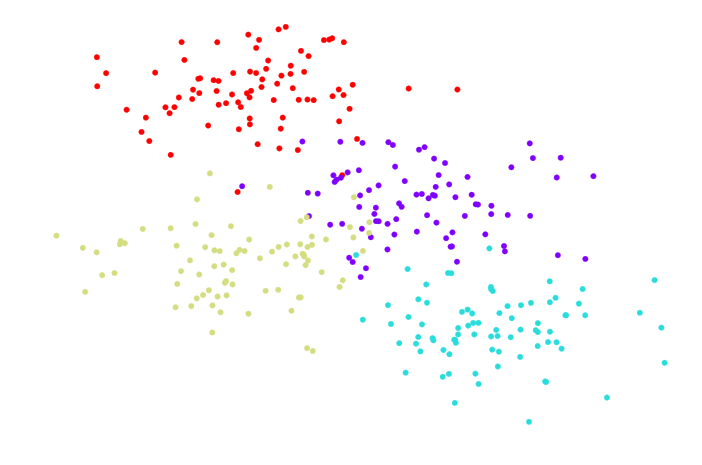

In [6]:
visualize_classifier(DecisionTreeClassifier(), X, y)

## Random Forest - addressing the problem of overfitting using multiple trees (n_estimators)

### Import DecisionTree and BaggingClassifiers

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

### Create DecisionTree model and feed into BaggingClassifier 

In [ ]:
tree = DecisionTreeClassifier()

bag = BaggingClassifier(tree, 
                        n_estimators=100,
                       max_samples = 0.8,
                       random_state = 1)

### Fit the model 

In [ ]:
bag.fit(X, y)

### Visualize

In [ ]:
visualize_classifier(bag, X, y)

### Using RandomForestClassfier approach
less overfitting is applied using this aproach

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators = 100, 
                              random_state = 0)

visualize_classifier(model, X, y)

## Digits classification using random forest

### Load data and plot

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()

In [ ]:
digits.keys()

In [ ]:
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left = 0,
                   right = 1,
                   bottom = 0,
                   top = 1,
                   hspace = 0.05,
                   wspace = 0.05)

In [ ]:
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[]) 
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

### Build model, predict

In [ ]:
from sklearn.cross_validation import train_test_split

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, 
                                                digits.target,
                                                random_state=0)

model = RandomForestClassifier(n_estimators=1000)

model.fit(Xtrain, 
          ytrain)

ypred = model.predict(Xtest)


### Classification report

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report(ypred, ytest))

### Confusion Matrix

In [ ]:
import seaborn
from sklearn.metrics import confusion_matrix

In [ ]:
mat = confusion_matrix(ytest, ypred)
seaborn.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False) 
plt.xlabel('true label')
plt.ylabel('predicted label')